# Stroke Prediction
In this project, I will perform explanatory data analysis on the Stroke Prediction Dataset from Kaggle and train a model to predict whether a patient is likely to experience a stroke based on several factors, such as gender, age, bmi, and more. 

The outline for the project is as follows:
1. Import Libraries & Dataset
2. Exploratory Data Analysis (EDA)
3. Data Preprocessing for Model
4. Model Creation
5. Results

## Import Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Exploratory Data Analysis 

In [3]:
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Using the head function, we observe that there are 11 fields available to determine a patient's likelihood of stroke. These fields are id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, and smoking_status. Because the id field is likely a patient identifier, we can assume it not does relate to the possibility of stroke and can thus drop the field. 

In [4]:
data.drop(['id'], axis=1, inplace = True)

In [5]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We observe that there are 201 null values in the bmi column. In order to fix this and increase consistency, we can replace these null values with the average bmi value.

In [6]:
avg_bmi = data['bmi'].mean()
data['bmi'].fillna(avg_bmi,inplace=True)

In [7]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Now that all null values are taken care of, we can now analyze each variable individually.

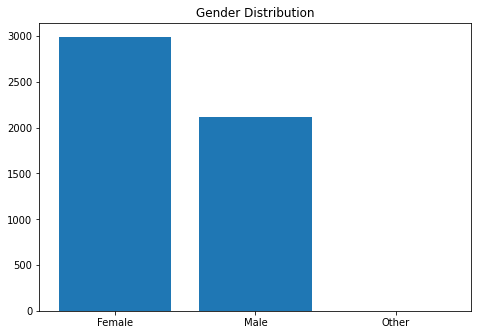

Percentage of Females:  0.5859099804305283
Percentage of Males:  0.41389432485322897
Percentage of Other:  0.00019569471624266145


In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ["Female", "Male", "Other"]
x = data["gender"].value_counts()['Female']
y = data["gender"].value_counts()['Male']
z = data["gender"].value_counts()['Other']
counts = [x, y, z]
ax.bar(gender, counts)
plt.title("Gender Distribution")
plt.show()

print("Percentage of Females: ", x /(x+y+z))
print("Percentage of Males: ", y /(x+y+z))
print("Percentage of Other: ", z /(x+y+z))

From the histogram, we can see that there is a greater amount of female patients than male patients in the dataset, and almost no patients in the gender category of "other". In particular, 58.59% of the dataset is made up of females, 41.39% is made up of males, and 0.02% is made up of other genders.

Amount of Patients in Each Age Group
Ages 0-10:  507
Ages 10-20:  518
Ages 20-30:  545
Ages 30-40:  674
Ages 40-50:  739
Ages 50-60:  823
Ages 60-70:  594
Ages 70-80:  594
Ages 80+:  116


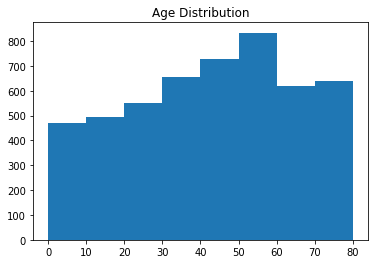

In [9]:
plt.hist(data["age"], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80])
plt.title("Age Distribution")

data_age_groups = data.copy()
def age_group(age):
    if age >= 0:
        if age <= 10:
            return "0-10"
        elif age <= 20:
            return "10-20"
        elif age <= 30:
            return "20-30"
        elif age <= 40:
            return "30-40"
        elif age <= 50:
            return "40-50"
        elif age <= 60:
            return "50-60"
        elif age <= 70:
            return "60-70"
        elif age <= 80:
            return "70-80"
        else:
            return "80+"
    
data_age_groups["age group"] = data_age_groups['age'].apply(age_group)

print("Amount of Patients in Each Age Group")
print("Ages 0-10: ", data_age_groups["age group"].value_counts()["0-10"])
print("Ages 10-20: ", data_age_groups["age group"].value_counts()["10-20"])
print("Ages 20-30: ", data_age_groups["age group"].value_counts()["20-30"])
print("Ages 30-40: ", data_age_groups["age group"].value_counts()["30-40"])
print("Ages 40-50: ", data_age_groups["age group"].value_counts()["40-50"])
print("Ages 50-60: ", data_age_groups["age group"].value_counts()["50-60"])
print("Ages 60-70: ", data_age_groups["age group"].value_counts()["60-70"])
print("Ages 70-80: ", data_age_groups["age group"].value_counts()["70-80"])
print("Ages 80+: ", data_age_groups["age group"].value_counts()["80+"])

The age distribution histogram shows that the age data is slightly skewed left, with a greater number of patients from older age groups. The statistics indicate that there are 507 patients ages 0-10, 518 patients ages 11-20, 545 patients ages 21-30, 674 patients ages 31-40, 739 patients ages 41-50, 823 patients ages 51-60, 594 patients ages 61-70, 594 patients ages 71-80, and 116 patients older than 80. Thus, the age group with the largest number of patients is the 50-60 group, followed behind by the 40-50 group.

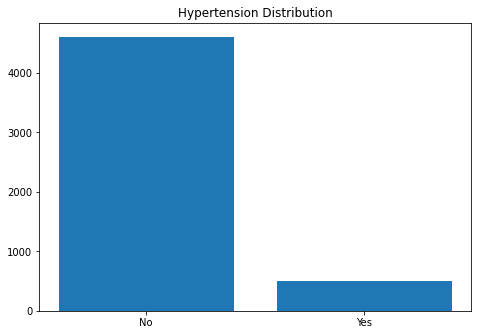

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
values = ["No", "Yes"]
x = data["hypertension"].value_counts()[0]
y = data["hypertension"].value_counts()[1]
counts = [x, y]
ax.bar(values, counts)
plt.title("Hypertension Distribution")
plt.show()

From the histogram, we can see that the amount of patients with hypertension is significantly less than those with hypertension. Based on the size of the bars, we can estimate that there are nine times more patients without hypertension than with hypertension.

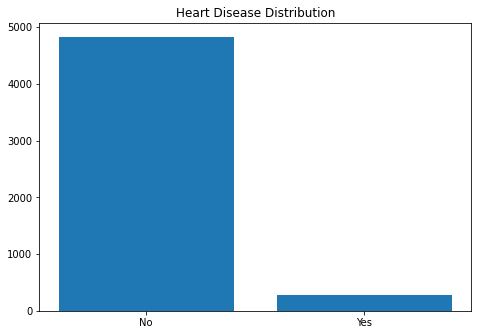

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
values = ["No", "Yes"]
x = data["heart_disease"].value_counts()[0]
y = data["heart_disease"].value_counts()[1]
counts = [x, y]
ax.bar(values, counts)
plt.title("Heart Disease Distribution")
plt.show()

Similarly to the hypertension distribution, it is clear that there are substantially more patients without heart disease than with heart disease in the dataset.

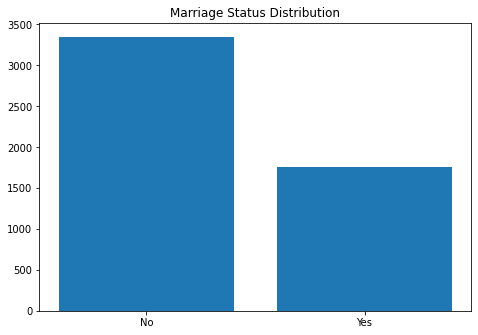

Amount of Patients who have been married:  1757
Amount of Patients who have been never married:  3353


In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
values = ["No", "Yes"]
x = data["ever_married"].value_counts()[0]
y = data["ever_married"].value_counts()[1]
counts = [x, y]
ax.bar(values, counts)
plt.title("Marriage Status Distribution")
plt.show()
print("Amount of Patients who have been married: ", y)
print("Amount of Patients who have been never married: ", x)

In terms of marriage status, the histogram indicates that the amount of patients who have been married is slightly more than half of the amount of patients who have never been married. Particularly,the amount of patients who have been married is 1757 and the amount of patients who have never been married is 3353.

Private:  2925
Self Employed:  819
Government Job:  657
Children:  687
Never Worked:  22


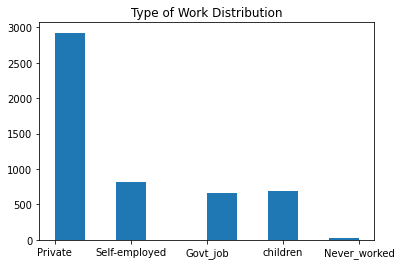

In [13]:
plt.hist(data["work_type"])
plt.title("Type of Work Distribution")

private = data["work_type"].value_counts()["Private"]
self_employed = data["work_type"].value_counts()["Self-employed"]
govt_job = data["work_type"].value_counts()["Govt_job"]
children = data["work_type"].value_counts()["children"]
never_worked = data["work_type"].value_counts()["Never_worked"]

print("Private: ", private)
print("Self Employed: ", self_employed)
print("Government Job: ", govt_job)
print("Children: ", children)
print("Never Worked: ", never_worked)

Of the patients in the dataset, there is the greatest amount of patients with a private work type and the least amount of patients with no work experience. In fact, 2925 patients have a private work type, whereas 22 patients have never worked. In between the two extremes, there are 819 self-employed patients, 687 patients with children, and 657 patients with government jobs.

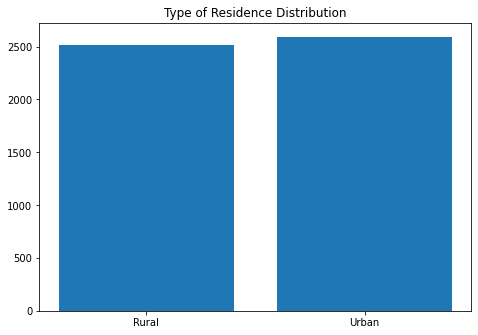

In [14]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
values = ["Rural", "Urban"]
x = data["Residence_type"].value_counts()["Rural"]
y = data["Residence_type"].value_counts()["Urban"]
counts = [x, y]
ax.bar(values, counts)
plt.title("Type of Residence Distribution")
plt.show()

The amount of patients that reside in rural areas seems to be roughly equal to the amount of patients that reside in urban areas, with those in urban areas being slightly greater.

Text(0.5, 1.0, 'Smoking Status Distribution')

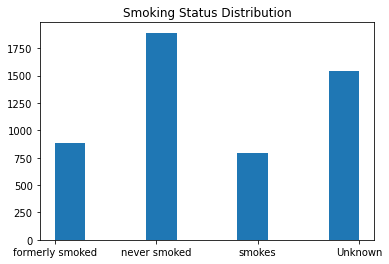

In [15]:
plt.hist(data["smoking_status"])
plt.title("Smoking Status Distribution")

Of the patients whose smoking status is known, the greatest amount are those who have never smoked, with lesser but similar amounts of patients that have either formerly or currently smoke. There is also a substantial amount of patients with an unknown smoking status.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Median:  91.88499999999999
Mean:  106.1476771037182


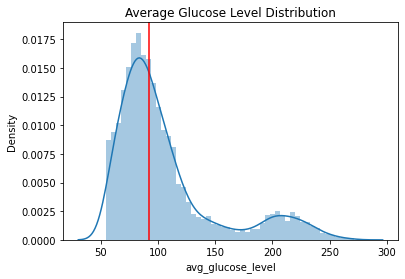

In [16]:
sns.distplot(data['avg_glucose_level']).set(title="Average Glucose Level Distribution")
plt.axvline(x=data.avg_glucose_level.median(), color='red')
print("Median: ", data.avg_glucose_level.median())

print("Mean: ", data.avg_glucose_level.mean())

The average glucose level distribution is skewed right, with a major peak around roughly 80 and a smaller peak around 210. The median of the average glucose levels of the patients is 91.88, and the mean is 106.14.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Median:  28.4


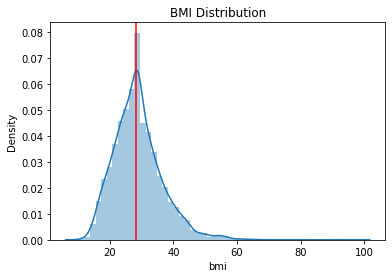

In [17]:
sns.distplot(data['bmi']).set(title="BMI Distribution")
plt.axvline(x=data.bmi.median(), color='red')
print("Median: ", data.bmi.median())


The bmi distribution is skewed right, with a majority of patients have a bmi between 20 and 40. The median of the distribution is 28.4 and aligns with the only peak.

Next, we can observe the relationship between each variable and the likelihood of stroke.

[Text(0.5, 1.0, 'Stroke Distribution by Gender')]

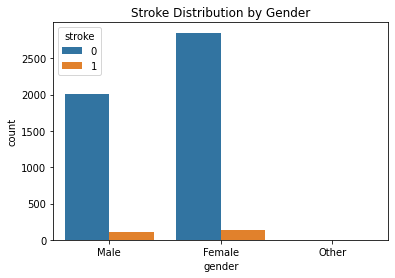

In [18]:
sns.countplot(data=data, x='gender', hue='stroke').set(title="Stroke Distribution by Gender")

From the histogram, we can see that a very small portion of both males and females in the dataset experienced stroke. Although the amount of patients of each gender varies, it seems that the amount of those who experienced stroke in both genders is about the same. 

[Text(0.5, 1.0, 'Stroke Distribution by Hypertension')]

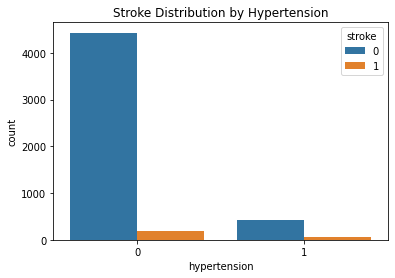

In [19]:
sns.countplot(data=data, x='hypertension', hue='stroke').set(title="Stroke Distribution by Hypertension")

We can observe that patients that did not suffer from hypertension had a larger number of stroke cases than those that did have hypertension.

[Text(0.5, 1.0, 'Stroke Distribution by Heart Disease')]

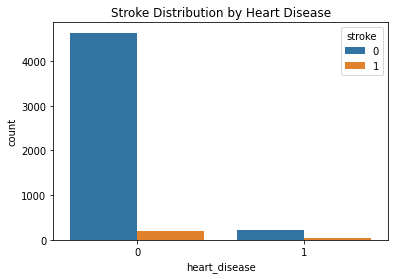

In [20]:
sns.countplot(data=data, x='heart_disease', hue='stroke').set(title="Stroke Distribution by Heart Disease")

As can be seen above, there were sizably more patients that experienced a stroke and didn't have heart disease than those who had both. 

[Text(0.5, 1.0, 'Stroke Distribution by Marriage Status')]

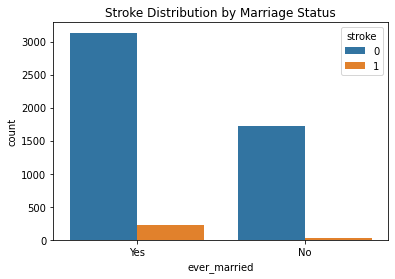

In [21]:
sns.countplot(data=data, x='ever_married', hue='stroke').set(title="Stroke Distribution by Marriage Status")

The histogram indicates that a greater amount of patients that were married experienced stroke than those that were not married.

[Text(0.5, 1.0, 'Stroke Distribution by Work Type')]

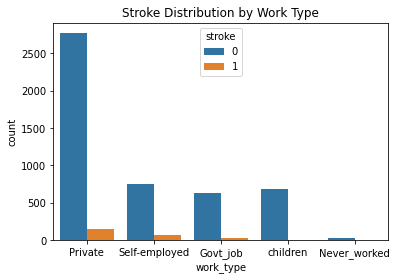

In [22]:
sns.countplot(data=data, x='work_type', hue='stroke').set(title="Stroke Distribution by Work Type")

Most of the patients who experienced strokes worked in private jobs. 

[Text(0.5, 1.0, 'Stroke Distribution by Residence Type')]

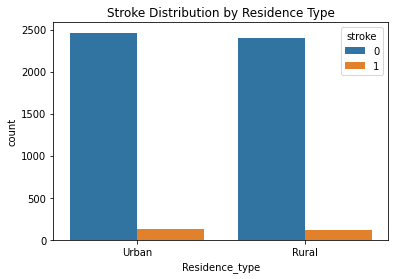

In [23]:
sns.countplot(data=data, x='Residence_type', hue='stroke').set(title="Stroke Distribution by Residence Type")

There appears to be a similar amount of patients from both urban and rural areas that experienced stroke.

[Text(0.5, 1.0, 'Stroke Distribution by Smoking Status')]

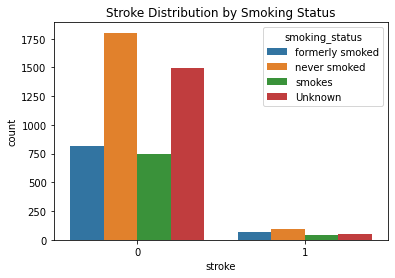

In [24]:
sns.countplot(data=data, x='stroke', hue='smoking_status').set(title="Stroke Distribution by Smoking Status")

As for smoking status, we observe that of those that experienced stroke, the largest amount is from patients that never smoked, with those that formerly stroke falling close behind. 

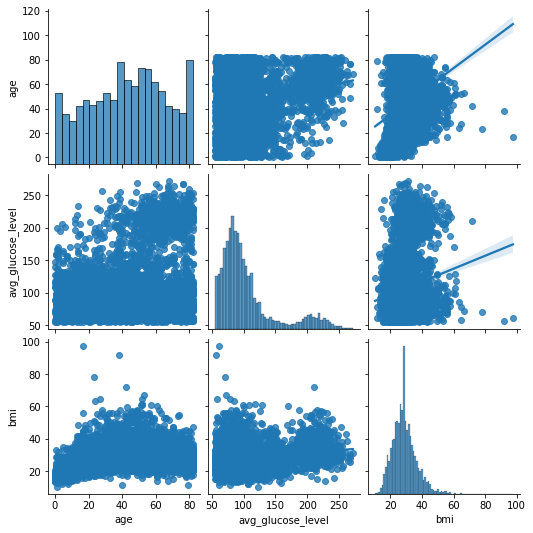

In [25]:
sns.pairplot(data, vars=["age", "avg_glucose_level","bmi"],kind="reg")

The pairplot indicates that there is a positive association between bmi and age, and bmi and average glucose level. 

## Data Preprocessing for Model

In [26]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Because gender, ever_married, and Residence_type are all of the type 'object', we can utilize the LabelEncoder to assign a unique integer to each label in these fields.

In [27]:
encoder = preprocessing.LabelEncoder()
data["gender"] = encoder.fit_transform(data["gender"])
data["ever_married"] = encoder.fit_transform(data["ever_married"])
data["Residence_type"] = encoder.fit_transform(data["Residence_type"])

Because there are multiple categories for the work_type and smoking_status field, we will use the get_dummies function to convert the data in those fields into dummy variables.

In [28]:
data = pd.get_dummies(data)
data.head(5)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.400000,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,0,1,0,0,0,1,0


We will then use the SMOTE technique to replicate examples for the minority class in order to solve the existing imbalance of patients in the dataset who have and haven't experienced a stroke.

In [29]:
x_vars = data.drop(columns = ["stroke"])
y = data["stroke"]

smote = SMOTE(random_state = 101)
x_sm, y_sm = smote.fit_resample(x_vars,y)

## Model Creation & Selection

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Given our training and testing sets, we will now try several models to see which results in the greatest accuracy. Specifically, we will try logistic regression, the RandomForest classifier, the AdaBoost classifier, the GradientBoosting classifier, and the KNeighbors classifier. 

In [31]:
lreg = LogisticRegression()
lreg.fit(x_train, y_train)
lreg_preds = lreg.predict(x_test)
accuracy = lreg.score(x_test, y_test)
print("Accuracy: ", accuracy)
print(classification_report(y_test, lreg_preds))

Accuracy:  0.9197943444730077
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       975
           1       0.96      0.88      0.92       970

    accuracy                           0.92      1945
   macro avg       0.92      0.92      0.92      1945
weighted avg       0.92      0.92      0.92      1945



In [32]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_preds = rfc.predict(x_test)
accuracy = accuracy_score(y_test, rfc_preds)
print("Accuracy: ", accuracy)

Accuracy:  0.967095115681234


In [33]:
abc = AdaBoostClassifier()
abc.fit(x_train, y_train)
abc_preds = abc.predict(x_test)
accuracy = accuracy_score(y_test, abc_preds)
print("Accuracy: ", accuracy)

Accuracy:  0.9131105398457584


In [34]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
gbc_preds = abc.predict(x_test)
accuracy = accuracy_score(y_test, gbc_preds)
print("Accuracy: ", accuracy)

Accuracy:  0.9131105398457584


In [35]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
knn_preds = knn.predict(x_test)
accuracy = accuracy_score(y_test, knn_preds)
print("Accuracy: ", accuracy)

Accuracy:  0.9434447300771208


## Results
We observe that the Random Forest Classifier results in the highest accuracy score of 96.8%, thus indicating that such a model is the most appropriate choice for determining whether a patient is likely to experience stroke.